In [146]:
import pandas as pd
import numpy as np
import re
from collections import Counter
import sqlalchemy as db
from snowflake.sqlalchemy import URL

In [147]:
snowflake_credentials = pd.read_excel('/Users/prai/Desktop/Developement/snowflake_credentials.xlsx')
global user
global password
global account
global warehouse
global schema
user = str(snowflake_credentials.iloc[0,1])
password = str(snowflake_credentials.iloc[1,1])
account = str(snowflake_credentials.iloc[2,1])
warehouse = str(snowflake_credentials.iloc[3,1])
schema = str(snowflake_credentials.iloc[4,1])

global sfengine
sfengine = db.create_engine(URL(
    user = user
    ,password = password
    ,account = account
    ,warehouse = warehouse
    ,database = "TRANSFORM"
    ,schema = schema
))

In [148]:
input_global_id ='5d819c1c-d923-43b7-86eb-a6d200b29cac'
query = "select count(case when r.company_size in (10,20,30,40) then 1 end)/count(distinct r.id) as Small_companies, count(case when r.company_size in (50,60) then 1 end)/count(distinct r.id) as Medium_companies, count(case when r.company_size in (70,80,90) then 1 end)/count(distinct r.id) as Large_companies "+\
    "from replicon.xavier.reviews r inner join replicon.xavier.products p on r.source_site = p.source_site and r.source_product_id = p.source_product_id "+\
    "where r.status = '1' and is_disabled ='False' and r.company_size != 0 and p.global_id = '"+str(input_global_id)+"'"
Rating = pd.read_sql_query(query, sfengine)

Rating[['Small Businesses','Midsize Businesses','Enterprises']]=Rating[['small_companies','medium_companies','large_companies']]*100
Rating=Rating.drop(['small_companies','medium_companies','large_companies'],axis=1)
Rating=Rating.transpose()
Rating.to_csv('/Users/prai/Desktop/rating_size1.csv')

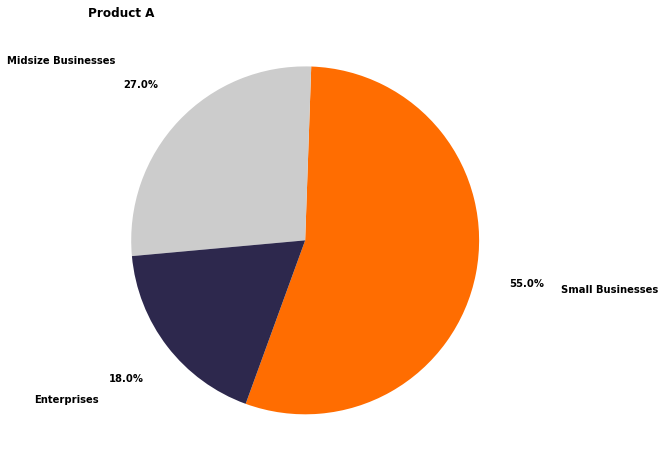

In [149]:
import matplotlib.pyplot as plt
import numpy as np
Rating=pd.read_csv('/Users/prai/Desktop/rating_size1.csv')
Rating['Val']=Rating['Val'].round(0).astype(int)
plt.figure(figsize=[10,8])

colors={'Small Businesses':'#ff6d01', 
        'Midsize Businesses':'#cccccc',
       'Enterprises':'#2d284d'}

plt.pie(Rating['Val'], colors=[colors[p] for p in Rating['Dat']], labels=Rating['Dat'],autopct='%1.1f%%',
        shadow=False, startangle=250,pctdistance=1.3, labeldistance=1.5)

plt.gca().yaxis.grid(True)

plt.title("Product A",fontweight='bold',loc='left')
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams['font.family'] = 'sans-serif'
plt.savefig('/Users/prai/Desktop/Pie_product_1.png',orientation='portrait')
plt.show()

In [91]:
# Product 2

In [150]:
input_global_id ='e2f7b101-60ed-448c-82a7-a6d200b7f02d'
query = "select count(case when r.company_size in (10,20,30,40) then 1 end)/count(distinct r.id) as Small_companies, count(case when r.company_size in (50,60) then 1 end)/count(distinct r.id) as Medium_companies, count(case when r.company_size in (70,80,90) then 1 end)/count(distinct r.id) as Large_companies "+\
    "from replicon.xavier.reviews r inner join replicon.xavier.products p on r.source_site = p.source_site and r.source_product_id = p.source_product_id "+\
    "where r.status = '1' and is_disabled ='False' and r.company_size != 0 and p.global_id = '"+str(input_global_id)+"'"
Rating = pd.read_sql_query(query, sfengine)

Rating[['Small Businesses','Midsize Businesses','Enterprises']]=Rating[['small_companies','medium_companies','large_companies']]*100
Rating=Rating.drop(['small_companies','medium_companies','large_companies'],axis=1)
Rating=Rating.transpose()
Rating.to_csv('/Users/prai/Desktop/rating_size2.csv')

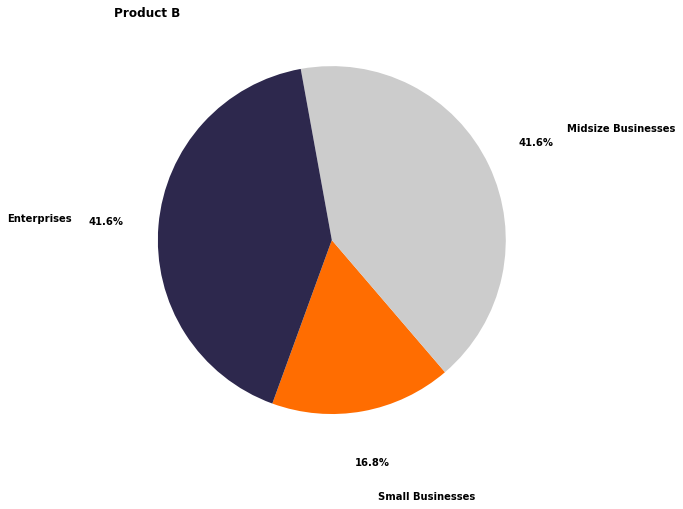

In [151]:
import matplotlib.pyplot as plt
import numpy as np
Rating=pd.read_csv('/Users/prai/Desktop/rating_size2.csv')
Rating['Val']=Rating['Val'].round(0).astype(int)
plt.figure(figsize=[10,8])

colors={'Small Businesses':'#ff6d01', 
        'Midsize Businesses':'#cccccc',
       'Enterprises':'#2d284d'}

plt.pie(Rating['Val'], colors=[colors[p] for p in Rating['Dat']], labels=Rating['Dat'],autopct='%1.1f%%',
        shadow=False, startangle=250,pctdistance=1.3, labeldistance=1.5)

plt.gca().yaxis.grid(True)

plt.title("Product B",fontweight='bold',loc='left')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.savefig('/Users/prai/Desktop/Pie_product_2.png',orientation='portrait')
plt.show()

In [133]:
import docx
from docx.shared import Inches
# Create an instance of a word document
doc = docx.Document()
  
# Add a Title to the document
doc.add_heading('Gartner Sample Data', 3)
doc.add_picture('/Users/prai/Desktop/Pie_product_1.png',width=Inches(2))
doc.add_picture('/Users/prai/Desktop/Pie_product_2.png',width=Inches(2))


# doc.add_picture('/Users/prai/Desktop/Rating.png', width=Inches(6))
# Table data in a form of list
data = (
    ("Author name", "Author = The name of the author who wrote the piece. Also include the name that should appear in the byline, if it differs."),
    ("H1", '"H1 = Title at the top of the content; the headline for the piece"'),
    ("Title Tag (< 60 characters)", "Title Tags = “Title” that appears in the SERPs - Often the same as the H1, unless the H1 is too many characters - Under 60 characters (preview it here)- Target keywords should be as close to the front as possible- Should be descriptive of the content, but also unique to stand out in the SERPs (Be sure to Google your targeted keyword and see how you can differentiate from what already there)"),
    ("Meta Description (150-170 characters)","Meta Descriptions = Description under the TT that appears in the SERPs - 150 to 170 characters - Should be detailed, relevant and eye-catching - Include keywords (this has no direct SEO impact, but they do appear bolded to catch a searcher's attention) - Use action-oriented language (e.g., Learn how... Discover how...Find out....) Resource: HubSpot has a great blog on the subject of writing meta descriptions: http://blog.hubspot.com/marketing/how-to-write-meta-description-ht."),
    ("URL","URLs  Match the URL as closely as possible to your highest volume keyword - Use hyphens to separate words (e.g., hipaa-violations-in-the-news)  Avoid using numbers, especially years or the number of products in a list piece unless approved by SEO  Always use all lowercase"),
    ("Keyword/volume"," "),
    ("Market or Blog Category:","Choose from column C in this list"),
    ("[Capterra Only] Subheadline","A secondary headline that expands on the title and compels the audience to keep reading. Appears under the H1 and above the header image in Capterra blog content. Appears above the header image Example."))
  
# Creating a table object
table = doc.add_table(rows=1, cols=2)
  
# Adding heading in the 1st row of the table
row = table.rows[0].cells
row[0].text = 'Column 1'
row[1].text = 'Column 2'
  
# Adding data from the list to the table
for id, name in data:
  
    # Adding a row and then adding data in it.
    row = table.add_row().cells
    # Converting id to string as table can only take string input
    row[0].text = str(id)
    row[1].text = name
table.name = 'MS Gothic'
table.size = docx.shared.Pt(15)
table.style = 'TableGrid'
font = table.style.font
font.bold= True

doc.add_page_break()
doc.save('/Users/prai/Desktop/gfg.docx')